In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Signal Parameters
fs = 1000  # Sampling frequency 1000 Hz
T = 1.0    # Duration 1 second
f1 = 50    # Frequency 1: 50 Hz
f2 = 120   # Frequency 2: 120 Hz
noise_power = 0.01

In [4]:
# Generate time vector
N = int(fs * T)
t = np.linspace(0, T, N, endpoint=False)

In [5]:
# Generate a two-tone signal with noise
signal = np.sin(2 * np.pi * f1 * t) + 0.5 * np.sin(2 * np.pi * f2 * t)
signal += np.random.normal(scale=np.sqrt(noise_power), size=t.shape)

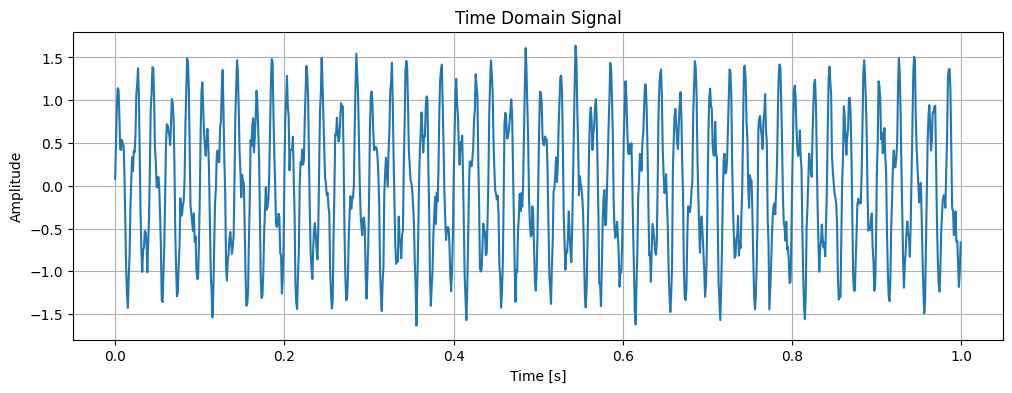

In [6]:
# Plot the time-domain signal
plt.figure(figsize=(12, 4))
plt.plot(t, signal)
plt.title("Time Domain Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

In [7]:
# Perform FFT
fft_result = np.fft.fft(signal)

In [8]:
# Frequencies corresponding to FFT bins
freqs = np.fft.fftfreq(N, 1/fs)

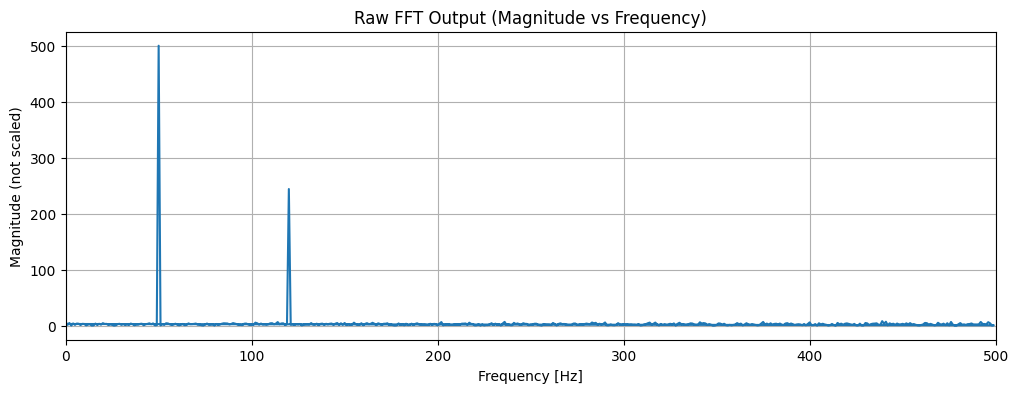

In [9]:
# Plot raw complex FFT output (magnitude vs bin)
plt.figure(figsize=(12, 4))
plt.plot(freqs, np.abs(fft_result))
plt.title("Raw FFT Output (Magnitude vs Frequency)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude (not scaled)")
plt.grid()
plt.xlim(0, fs/2)
plt.show()

In [10]:
# Calculate Magnitude Spectrum
magnitude = np.abs(fft_result)  # sqrt(re² + im²)

In [11]:
# Calculate dB Spectrum
magnitude_db = 20 * np.log10(magnitude + 1e-12)  # Add small value to avoid log(0)

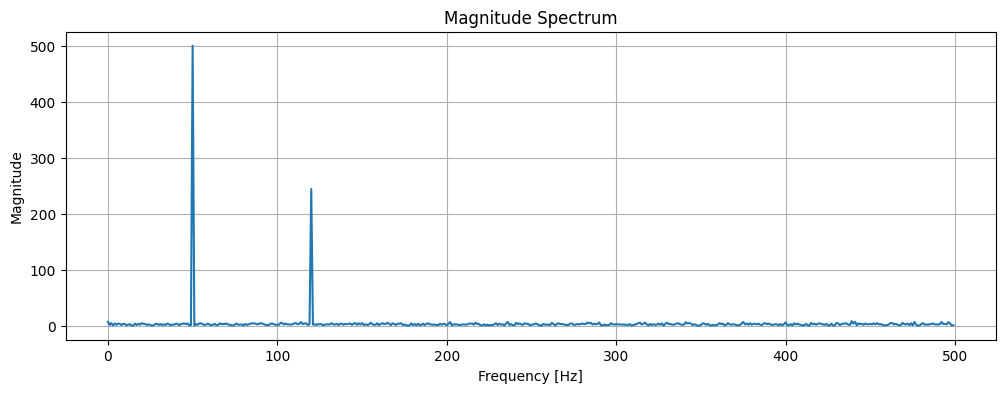

In [13]:
# Plot Magnitude Spectrum
plt.figure(figsize=(12, 4))
plt.plot(freqs[:N//2], magnitude[:N//2])
plt.title("Magnitude Spectrum")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.grid()
plt.show()

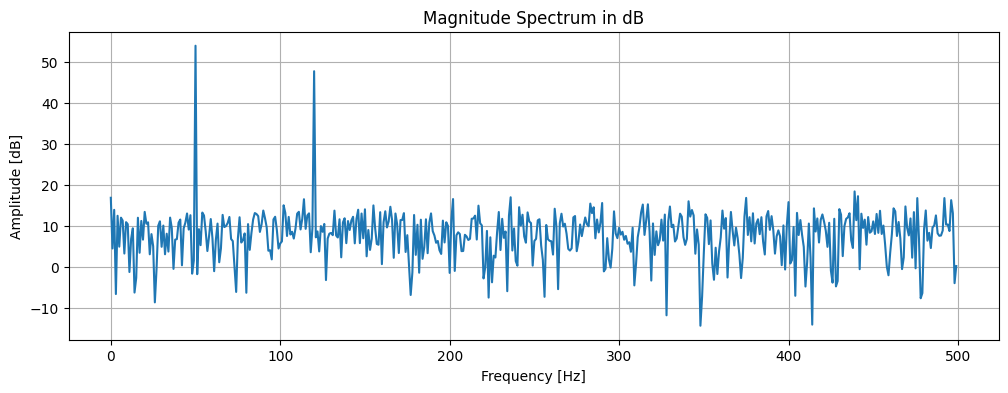

In [14]:
# Plot dB Spectrum
plt.figure(figsize=(12, 4))
plt.plot(freqs[:N//2], magnitude_db[:N//2])
plt.title("Magnitude Spectrum in dB")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude [dB]")
plt.grid()
plt.show()

In [15]:
# Annotated Summary:
print("\nSummary:")
print("- Time-domain signal: mixture of 50 Hz and 120 Hz with noise.")
print("- FFT gives complex output: real and imaginary parts.")
print("- Magnitude = sqrt(re^2 + im^2).")
print("- dB = 20 * log10(magnitude).")
print("- Peaks at ~50 Hz and ~120 Hz in magnitude and dB plots.")


Summary:
- Time-domain signal: mixture of 50 Hz and 120 Hz with noise.
- FFT gives complex output: real and imaginary parts.
- Magnitude = sqrt(re^2 + im^2).
- dB = 20 * log10(magnitude).
- Peaks at ~50 Hz and ~120 Hz in magnitude and dB plots.
